In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [14]:
palette = ['#003f5c', '#bc5090', '#ffa600', 'darkgoldenrod', 'navy', 'darkmagenta'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Number of stations"
labels = ['1 link', '2 links', '3 links']

In [24]:
data = pd.read_csv('station3.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,txBytes,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum
0,407456,1,1,1,1,1.34931,0.000014,0.056140,130.6500,1959591240,1986393888,1282455,1299996,1.00961,1.00961,121.000,121.000,18.5908,71996.70
1,407456,1,2,1,1,1.36369,0.000197,0.053702,65.3209,979658864,993203056,641138,650002,1.01895,1.01895,121.000,121.000,126.0710,34430.40
2,407456,2,2,1,1,1.36553,0.000197,0.053379,65.3231,979640528,993203056,641126,650002,1.02260,1.02260,120.997,120.997,126.0660,34222.40
3,407456,1,1,1,2,6.58648,0.000024,0.237932,123.7180,1855560416,1986393888,1214372,1299996,1.01352,1.01352,121.000,121.000,29.6870,288938.00
4,407456,1,1,1,3,7.12379,0.000025,0.181347,123.0080,1844887336,1986393888,1207387,1299996,1.01454,1.01454,121.000,121.000,30.6684,218955.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,407457,5,9,1,1,1.39223,0.001473,0.052022,14.5204,217639152,220711960,142434,144445,1.06943,1.06943,120.977,120.977,209.7790,7409.75
458,407457,6,9,1,1,1.36453,0.001473,0.052122,14.5200,217700272,220711960,142474,144445,1.05473,1.05473,121.000,121.000,209.8400,7426.00
459,407457,7,9,1,1,1.36730,0.001475,0.053086,14.5193,217694160,220711960,142470,144445,1.04090,1.04090,120.989,120.989,210.1090,7563.22
460,407457,8,9,1,1,1.37699,0.001474,0.051425,14.5181,217672768,220711960,142456,144445,1.02401,1.02401,120.970,120.970,209.9760,7325.88


In [16]:
data = data.groupby(['rngRun', 'nStations', 'linksNumber', 'distance'])\
           .agg({'latency': 'mean', 
                 'loss': 'mean', 
                 'jitter': 'mean', 
                 'throughput': 'sum'})\
           .reset_index()
data

,rngRun,nStations,linksNumber,distance,latency,loss,jitter,throughput
0,407456,1,1,1,0.056140,1.349310,0.000014,130.6500
1,407456,1,2,1,0.237932,6.586480,0.000024,123.7180
2,407456,1,3,1,0.181347,7.123790,0.000025,123.0080
3,407456,2,1,1,0.053540,1.364610,0.000197,130.6440
4,407456,2,2,1,0.002972,2.851680,0.000158,128.6691
...,...,...,...,...,...,...,...,...
63,407457,7,1,1,0.052882,1.365303,0.001109,130.6711
64,407457,7,2,1,0.002552,0.020846,0.000828,132.4295
65,407457,8,1,1,0.052981,1.370229,0.001292,130.6709
66,407457,8,2,1,0.001938,0.012846,0.000965,132.4444


C:\Users\Admin\AppData\Local\Temp\ipykernel_32292\2198552177.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


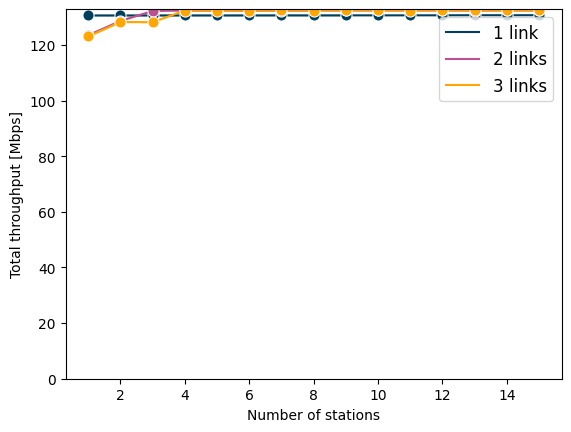

In [17]:
plot_sum = data.groupby(['nStations', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
ax.set_ylim(0)  
plt.savefig('sta_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_32292\256327700.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


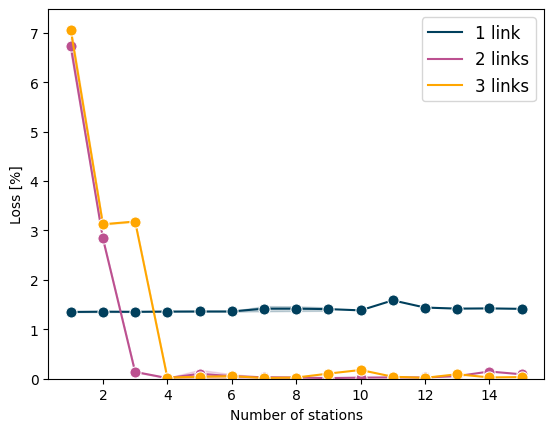

In [18]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Loss [%]')
ax.set_ylim(0)  
plt.savefig('sta_loss.svg', bbox_inches='tight')

In [19]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_32292\1171565398.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


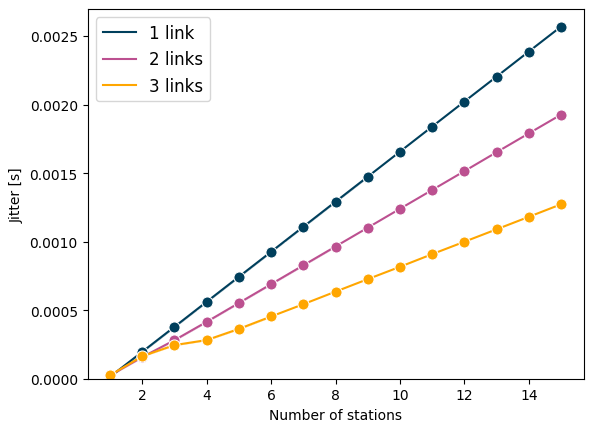

In [20]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Jitter [s]')
ax.set_ylim(0)  
plt.savefig('sta_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_32292\167697691.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')


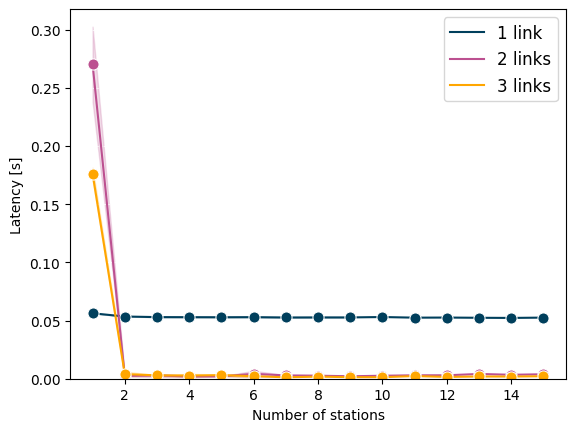

In [21]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='distance')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0)  
ax.set(xlabel=xlabel, ylabel='Latency [s]')
plt.savefig('sta_lat.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_32292\2836789617.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_32292\2836789617.py:19: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber',


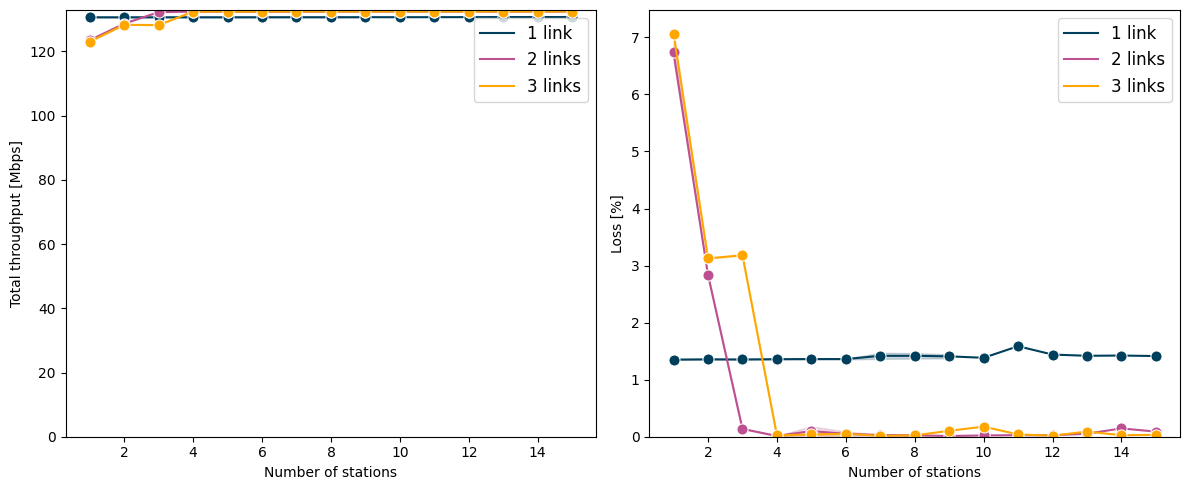

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Throughput
sns.lineplot(data=plot_sum, x='nStations', y='throughput', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='distance')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Loss
sns.lineplot(data=plot_sum, x='nStations', y='loss', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='distance')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel=xlabel, ylabel='Loss [%]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('sta_thr_loss.svg', bbox_inches='tight')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_32292\1962070765.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_32292\1962070765.py:19: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber',


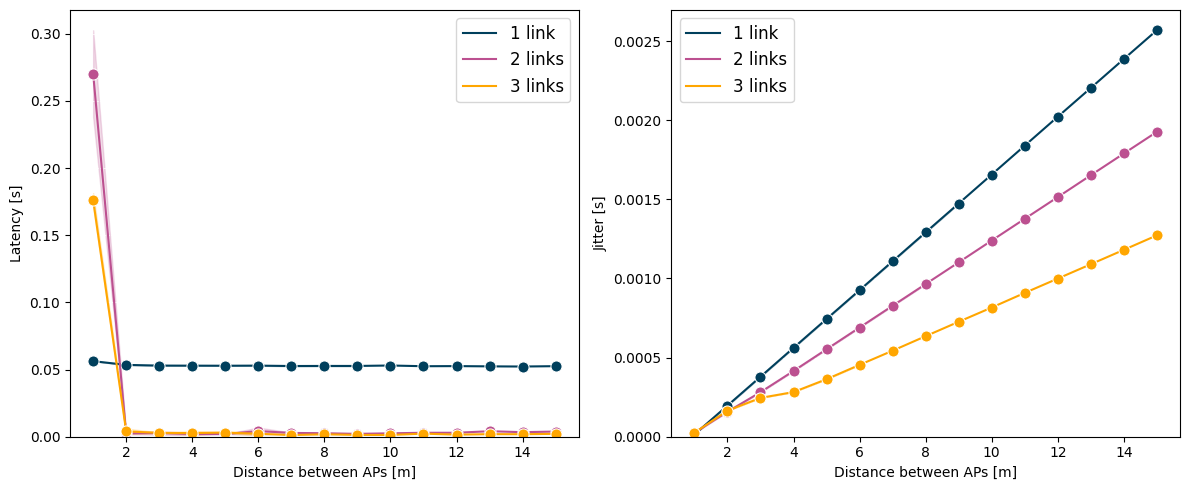

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Latency
sns.lineplot(data=plot_sum, x='nStations', y='latency', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='distance')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel='Distance between APs [m]', ylabel='Latency [s]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Jitter
sns.lineplot(data=plot_sum, x='nStations', y='jitter', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='distance')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel='Distance between APs [m]', ylabel='Jitter [s]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('sta_lat_jitter.svg', bbox_inches='tight')
plt.show()